In [1]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("agriRuralDevelopment.csv", sep=",")
data

,Country Name,Country Code,year,Access to electricity (% of population),"Access to electricity, rural (% of rural population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",...,Permanent cropland (% of land area),"Population, total",Rural land area (sq. km),Rural land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Rural population,Rural population (% of total population),Rural population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Surface area (sq. km)
0,Afghanistan,AFG,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8996973.0,NaN,NaN,NaN,8241137.0,91.599,NaN,NaN,NaN
1,Afghanistan,AFG,1961,NaN,NaN,NaN,57.745918,377000.0,120.0,0.156863,...,0.076586,9169410.0,NaN,NaN,NaN,8373138.0,91.316,1.589040,NaN,652860.0
2,Afghanistan,AFG,1962,NaN,NaN,NaN,57.837821,377600.0,150.0,0.194805,...,0.091903,9351441.0,NaN,NaN,NaN,8512056.0,91.024,1.645479,NaN,652860.0
3,Afghanistan,AFG,1963,NaN,NaN,NaN,57.914407,378100.0,200.0,0.258065,...,0.091903,9543205.0,NaN,NaN,NaN,8657977.0,90.724,1.699758,NaN,652860.0
4,Afghanistan,AFG,1964,NaN,NaN,NaN,58.010906,378730.0,200.0,0.256410,...,0.111816,9744781.0,NaN,NaN,NaN,8810646.0,90.414,1.747967,NaN,652860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13903,Zimbabwe,ZWE,2016,39.923992,18.278332,NaN,41.876696,162000.0,NaN,NaN,...,0.258498,14030390.0,NaN,NaN,NaN,9499135.0,67.704,1.681302,NaN,390760.0
13904,Zimbabwe,ZWE,2017,40.482048,19.152600,NaN,NaN,NaN,NaN,NaN,...,NaN,14236745.0,NaN,NaN,NaN,9647246.0,67.763,1.547174,NaN,390760.0
13905,Zimbabwe,ZWE,2018,41.041584,19.997750,NaN,NaN,NaN,NaN,NaN,...,NaN,14439018.0,NaN,NaN,NaN,9788355.0,67.791,1.452093,NaN,390760.0
13906,Zimbabwe,ZWE,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14645468.0,NaN,NaN,NaN,9928163.0,67.790,1.418205,NaN,NaN


Check names of aggregations by printing all country names. Removed names that need to be excluded.

In [2]:
countries = data['Country Name'].unique()
print(countries)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Arab World' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Caribbean small states' 'Cayman Islands' 'Central African Republic'
 'Central Europe and the Baltics' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czech Republic'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic'
 'East Asia & Pacific' 'Ecuador' 'Egypt, Arab Rep.' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Europe & Central Asia' 'European Union' 'Faroe Islands' 'Fiji' 'Finlan

In [3]:
exclude = ["Arab World", "Caribbean small states", "Central African Republic",
           "Central Europe and the Baltics", "East Asia & Pacific", "Europe & Central Asia",
           "European Union", "Latin America & Caribbean", "Middle East & North Africa",
           "North America", "Small states", "Sub-Saharan Africa", "World"]

exclude_mask = data["Country Name"].isin(exclude)
new_data = data[~exclude_mask]

new_data

,Country Name,Country Code,year,Access to electricity (% of population),"Access to electricity, rural (% of rural population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",...,Permanent cropland (% of land area),"Population, total",Rural land area (sq. km),Rural land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Rural population,Rural population (% of total population),Rural population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Surface area (sq. km)
0,Afghanistan,AFG,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8996973.0,NaN,NaN,NaN,8241137.0,91.599,NaN,NaN,NaN
1,Afghanistan,AFG,1961,NaN,NaN,NaN,57.745918,377000.0,120.0,0.156863,...,0.076586,9169410.0,NaN,NaN,NaN,8373138.0,91.316,1.589040,NaN,652860.0
2,Afghanistan,AFG,1962,NaN,NaN,NaN,57.837821,377600.0,150.0,0.194805,...,0.091903,9351441.0,NaN,NaN,NaN,8512056.0,91.024,1.645479,NaN,652860.0
3,Afghanistan,AFG,1963,NaN,NaN,NaN,57.914407,378100.0,200.0,0.258065,...,0.091903,9543205.0,NaN,NaN,NaN,8657977.0,90.724,1.699758,NaN,652860.0
4,Afghanistan,AFG,1964,NaN,NaN,NaN,58.010906,378730.0,200.0,0.256410,...,0.111816,9744781.0,NaN,NaN,NaN,8810646.0,90.414,1.747967,NaN,652860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13903,Zimbabwe,ZWE,2016,39.923992,18.278332,NaN,41.876696,162000.0,NaN,NaN,...,0.258498,14030390.0,NaN,NaN,NaN,9499135.0,67.704,1.681302,NaN,390760.0
13904,Zimbabwe,ZWE,2017,40.482048,19.152600,NaN,NaN,NaN,NaN,NaN,...,NaN,14236745.0,NaN,NaN,NaN,9647246.0,67.763,1.547174,NaN,390760.0
13905,Zimbabwe,ZWE,2018,41.041584,19.997750,NaN,NaN,NaN,NaN,NaN,...,NaN,14439018.0,NaN,NaN,NaN,9788355.0,67.791,1.452093,NaN,390760.0
13906,Zimbabwe,ZWE,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14645468.0,NaN,NaN,NaN,9928163.0,67.790,1.418205,NaN,NaN


For imputations an multivariate imputer is used.

In [4]:
imp = IterativeImputer(max_iter=10, random_state=0)
missing_columns = ["Access to electricity (% of population)","Access to electricity, rural (% of rural population)","Agricultural irrigated land (% of total agricultural land)",
    "Agricultural land (% of land area)","Agricultural land (sq. km)","Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",
    "Agricultural methane emissions (% of total)","Agricultural methane emissions (thousand metric tons of CO2 equivalent)","Agricultural nitrous oxide emissions (% of total)",
    "Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent)","Agricultural raw materials exports (% of merchandise exports)","Agricultural raw materials imports (% of merchandise imports)",
    "Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (current US$)","Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)",
    "Arable land (% of land area)","Arable land (hectares per person)","Arable land (hectares)","Average precipitation in depth (mm per year)","Birth rate, crude (per 1,000 people)","Cereal production (metric tons)",
    "Cereal yield (kg per hectare)","CPIA gender equality rating (1=low to 6=high)","Crop production index (2004-2006 = 100)","Death rate, crude (per 1,000 people)",
    "Employment in agriculture (% of total employment) (modeled ILO estimate)","Employment in agriculture, female (% of female employment) (modeled ILO estimate)","Employment in agriculture, male (% of male employment) (modeled ILO estimate)",
    "Fertilizer consumption (% of fertilizer production)","Fertilizer consumption (kilograms per hectare of arable land)","Food production index (2004-2006 = 100)","Forest area (% of land area)","Forest area (sq. km)",
    "GDP per capita (current US$)","Land area (sq. km)","Land under cereal production (hectares)","Literacy rate, adult total (% of people ages 15 and above)","Livestock production index (2004-2006 = 100)","Mineral rents (% of GDP)",
    "Mortality rate, infant (per 1,000 live births)","Net migration","Permanent cropland (% of land area)","Population, total","Rural land area (sq. km)","Rural land area where elevation is below 5 meters (% of total land area)","Rural land area where elevation is below 5 meters (sq. km)",
    "Rural population","Rural population (% of total population)","Rural population growth (annual %)","Rural population living in areas where elevation is below 5 meters (% of total population)","Surface area (sq. km)"]

imp.fit(data[missing_columns])
new_data[missing_columns] = imp.transform(new_data[missing_columns])

new_data

c:\users\korisnik\documents\exercises\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Country Name,Country Code,year,Access to electricity (% of population),"Access to electricity, rural (% of rural population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",...,Permanent cropland (% of land area),"Population, total",Rural land area (sq. km),Rural land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Rural population,Rural population (% of total population),Rural population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Surface area (sq. km)
0,Afghanistan,AFG,1960,11.275536,-8.620314,1.671084,50.115339,702127.103925,239184.357578,-12.874778,...,1.069063,8.996973e+06,1.595775e+06,-17.985425,14863.605588,8.241137e+06,91.599000,2.437433,-798.717515,1.860918e+06
1,Afghanistan,AFG,1961,14.281591,-6.423188,-0.311505,57.745918,377000.000000,120.000000,0.156863,...,0.076586,9.169410e+06,6.046721e+05,-32.880173,4189.296187,8.373138e+06,91.316000,1.589040,-1414.188799,6.528600e+05
2,Afghanistan,AFG,1962,13.827071,-14.191340,8.089060,57.837821,377600.000000,150.000000,0.194805,...,0.091903,9.351441e+06,5.353080e+05,-282.507648,26781.088091,8.512056e+06,91.024000,1.645479,-11957.969069,6.528600e+05
3,Afghanistan,AFG,1963,10.666112,-15.923032,9.167620,57.914407,378100.000000,200.000000,0.258065,...,0.091903,9.543205e+06,6.036920e+05,-71.264148,8777.516802,8.657977e+06,90.724000,1.699758,-2919.589124,6.528600e+05
4,Afghanistan,AFG,1964,12.144458,-14.737444,9.269966,58.010906,378730.000000,200.000000,0.256410,...,0.111816,9.744781e+06,6.048248e+05,-65.491952,8098.996553,8.810646e+06,90.414000,1.747967,-2682.746046,6.528600e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13903,Zimbabwe,ZWE,2016,39.923992,18.278332,5.248495,41.876696,162000.000000,39363.368561,24.101364,...,0.258498,1.403039e+07,3.571718e+05,-27.502027,5868.191328,9.499135e+06,67.704000,1.681302,-1202.705740,3.907600e+05
13904,Zimbabwe,ZWE,2017,40.482048,19.152600,7.154332,40.567018,151141.165487,57200.270676,228.795215,...,0.424531,1.423674e+07,3.590539e+05,484.207046,-45095.270621,9.647246e+06,67.763000,1.547174,20675.832247,3.907600e+05
13905,Zimbabwe,ZWE,2018,41.041584,19.997750,6.239272,38.765176,357757.833262,359389.902894,223.335368,...,2.198408,1.443902e+07,2.937543e+05,43.939867,-1464.765142,9.788355e+06,67.791000,1.452093,1597.986001,3.907600e+05
13906,Zimbabwe,ZWE,2019,66.230669,57.123643,4.314403,40.337097,687557.034806,272340.668445,282.307154,...,3.358137,1.464547e+07,1.651870e+06,21.322571,14174.171233,9.928163e+06,67.790000,1.418205,782.594063,1.857323e+06


## Visualization of the data

This plot shows a barplot using *matplotlib* library that represents employment in agriculture in
Croatia from the years 2015 to 2020.

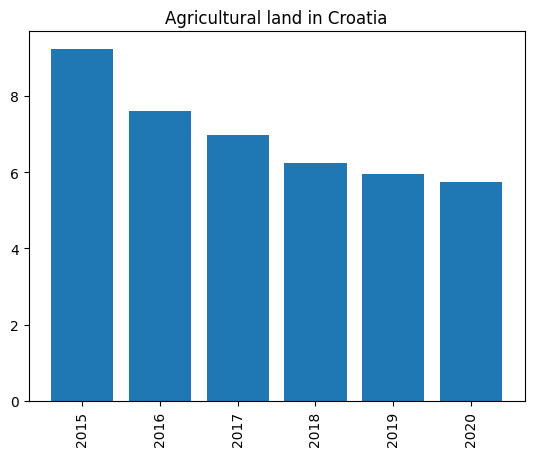

In [5]:
data_subset = new_data[(new_data["Country Name"] == "Croatia")]
data_subset = data_subset[(data_subset["year"] > 2014)]
vis_data = data_subset[["year", "Employment in agriculture (% of total employment) (modeled ILO estimate)"]]
# print(vis_data)
plt.bar(vis_data["year"], vis_data["Employment in agriculture (% of total employment) (modeled ILO estimate)"])
plt.xticks(rotation=90)
plt.title("Agricultural land in Croatia")
plt.show()

This plot is a relational plot which depicts Rural land area from years 2015 to 2019 for countries Austria.
France, Germany, Italy and Croatia. The size of the point tells us the countrie's GDP.

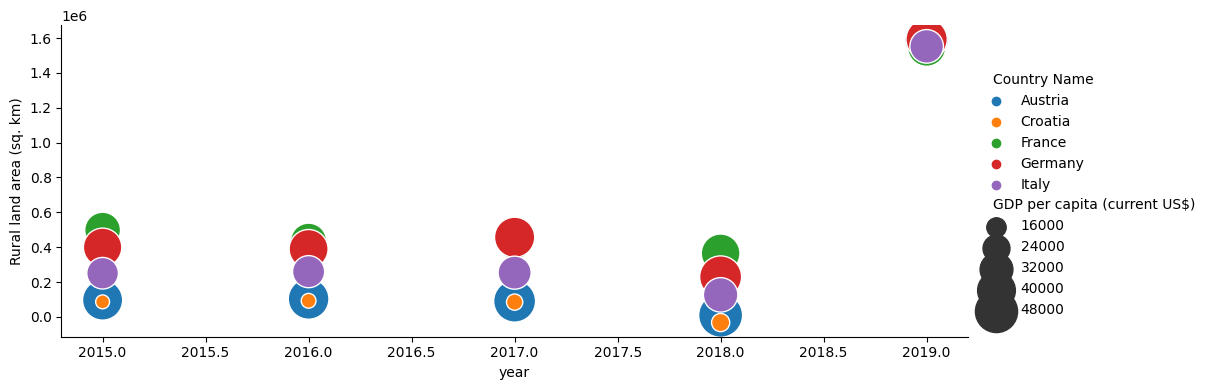

In [6]:
countries = ['Austria', 'France', 'Germany', 'Italy', 'Croatia']

data_subset = new_data[new_data["Country Name"].isin(countries)]
data_subset = data_subset[data_subset["year"].isin([2015, 2016, 2017, 2018, 2019])]

plot = sns.relplot(x=data_subset["year"], y=data_subset["Rural land area (sq. km)"],
            hue=data_subset["Country Name"], size=data_subset["GDP per capita (current US$)"],
            sizes=(100, 1000), height=4, aspect=10/4, label="big")

Finally, the new dataset is saved.

In [7]:
new_data.to_csv("agriRuralsDevelopment_reduced.csv")